# California Housing

# Reading a CSV file

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

cal_df = pd.read_csv("housing.csv")

print (cal_df.describe())

cal_df.isnull().sum()

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Handle missing value

- We see that there are 207 null values in Column total_bedrooms
- We replace the null values with the mean and check for nulls again.


In [2]:

cal_df.total_bedrooms=cal_df.total_bedrooms.fillna(cal_df.total_bedrooms.mean())
cal_df.isnull().sum()

NameError: name 'cal_df' is not defined

## Encoding categorical variable

In [4]:
LE = LabelEncoder()
cal_df['ocean_proximity']=LE.fit_transform(cal_df['ocean_proximity'])

print (cal_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.5 MB
None


In [5]:
# Get column names first
names = cal_df.columns
# Create the Scaler object
scaler = StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(cal_df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.129631,1.291089
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.314156,1.291089
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.258693,1.291089
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.165100,1.291089
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.172900,1.291089


## Visualise data

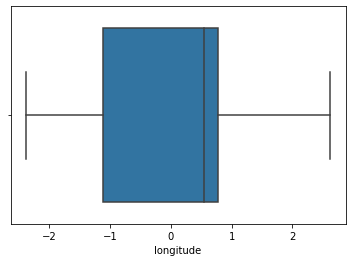

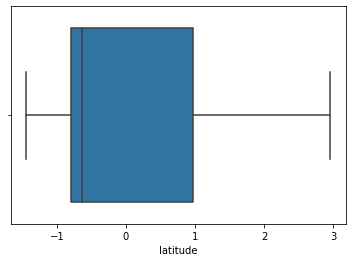

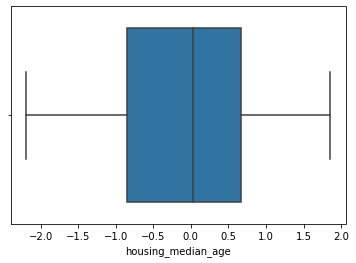

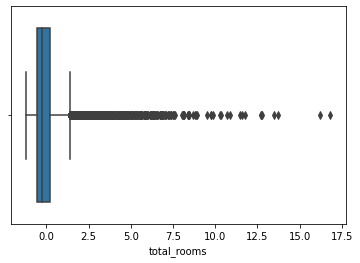

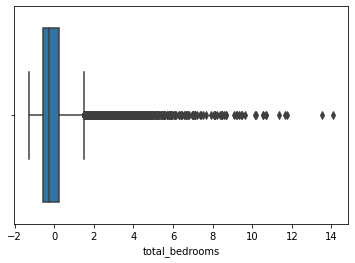

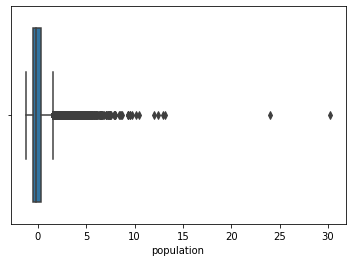

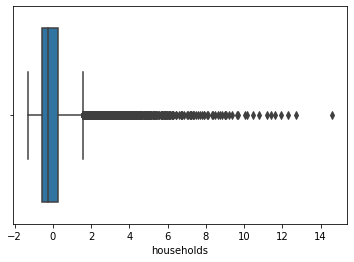

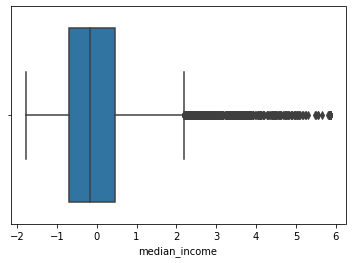

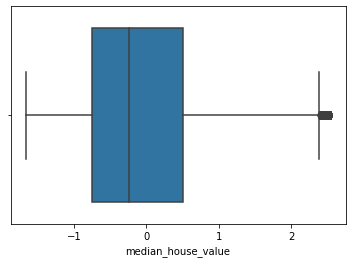

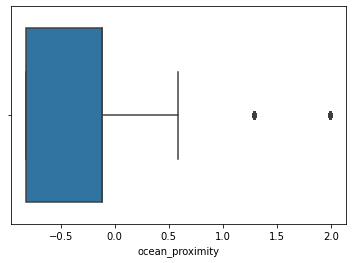

In [6]:
for column in scaled_df:
    plt.figure()
    sns.boxplot(x=scaled_df[column])

## Visualise Target Variable

<AxesSubplot:>

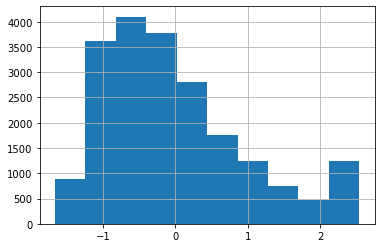

In [7]:
scaled_df['median_house_value'].hist()

<AxesSubplot:>

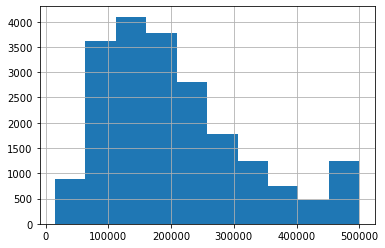

In [8]:
cal_df['median_house_value'].hist()

### Our Independent variables (X)

In [25]:
X = scaled_df.drop('median_house_value', axis = 1)

# Our descriptive feature
# print (X.describe())
print (X.info())
print (X.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
(20640, 9)


## Our target variable

In [26]:

y = scaled_df['median_house_value']

print (y.describe())
print (y.shape)

count    2.064000e+04
mean     8.950635e-16
std      1.000024e+00
min     -1.662641e+00
25%     -7.561633e-01
50%     -2.353337e-01
75%      5.014973e-01
max      2.540411e+00
Name: median_house_value, dtype: float64
(20640,)


## Let's build our Linear regression Model

### Slitting into train and test

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.20, random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(16512, 9)
(16512,)
(4128, 9)
(4128,)


## Model building

In [28]:
regression = linear_model.LinearRegression() # we create an object of the LR class
regression.fit(X_train, Y_train) # training / fitting model on data;


print ("\n\nLet's evalaute our model on our held-out test data\n")

print("R-Sqaured: %.3f"
      % regression.score(X_test,Y_test)) # R-squared 

Y_pred = regression.predict(X_test) 
print("Mean squared error: %.3f"
      % mean_squared_error(Y_test, Y_pred))  # Test MSE

print("Mean absolute error: %.3f"
      % mean_absolute_error(Y_test, Y_pred))

print ("\n\n\nLet's see how parameters were learnt in training.\n")

print("The intercept / beta_0 is {}".format(regression.intercept_)) 
for i, col_name in enumerate(X_train.columns):
    print("The coefficient (beta_{}) for {} is {}".format(i, col_name, regression.coef_[i]))



Let's evalaute our model on our held-out test data

R-Sqaured: 0.628
Mean squared error: 0.367
Mean absolute error: 0.441



Let's see how parameters were learnt in training.

The intercept / beta_0 is 0.003099419345803863
The coefficient (beta_0) for longitude is -0.7413579980146909
The coefficient (beta_1) for latitude is -0.7860590132638912
The coefficient (beta_2) for housing_median_age is 0.12673027419143984
The coefficient (beta_3) for total_rooms is -0.13863560961384971
The coefficient (beta_4) for total_bedrooms is 0.32264339864966896
The coefficient (beta_5) for population is -0.38283215675776194
The coefficient (beta_6) for households is 0.23717832764129307
The coefficient (beta_7) for median_income is 0.66374116785408
The coefficient (beta_8) for ocean_proximity is 0.005272966208020894
